1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

In [ ]:

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

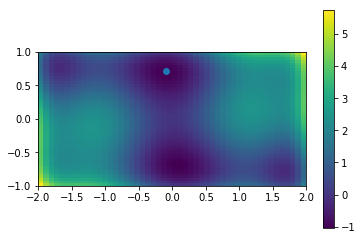

In [3]:


x_min = optimize.minimize(sixhump, x0=[0, 0.1])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [4]:
x_min

      fun: -1.0316284534898148
 hess_inv: array([[ 0.12908062, -0.00794293],
       [-0.00794293,  0.06166789]])
      jac: array([-2.98023224e-08, -1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-0.08984201,  0.71265632])

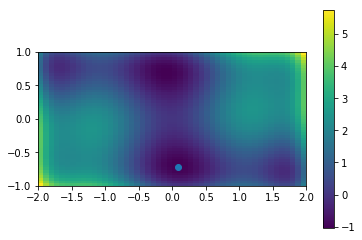

In [5]:

x_min = optimize.minimize(sixhump, x0=[0, -0.1])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# The global minimum:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()



In [6]:
x_min

      fun: -1.0316284534898341
 hess_inv: array([[ 0.12908054, -0.00794286],
       [-0.00794286,  0.0616679 ]])
      jac: array([1.49011612e-08, 1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([ 0.089842  , -0.71265633])

* Ans:
*** There are tow global minimum  in these points:
x1: array([ 0.089842  , -0.71265633]) fun value: -1.0316284534898341
x2: array([-0.08984201,  0.71265632]) fun value: -1.0316284534898148 ***

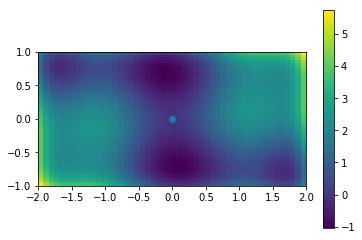

In [7]:

x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# another global minimum:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()


In [8]:
x_min

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

* Ans:
***If we chose the exact point of 0,0: due to this point being in maximum, the algorithm will choose this point as a minimum. But if we change a little this point the algorithm will chose the correct points ***

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

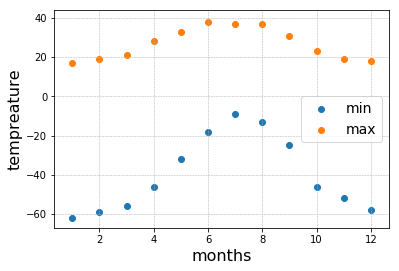

In [9]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
#maxs={'jan':17,'feb':19,'maarch':21, 'April':28,  'may':33, 'june':38, 'jul':37,  'ag':37, 'sep': 31,  'oct': 23,  'nov':19,  'dec':18}

maxs=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mins=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

month=np.arange(1,13)
months=[]
data=[]
for i in range(12):
    data.append(maxs[i])
    data.append(mins[i])
    months.append(month[i])
    months.append(month[i])

plt.scatter(month,mins,label='min')
plt.scatter(month,maxs,label='max')
plt.xlabel("months", fontsize=16)
plt.ylabel("tempreature", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(linestyle="--", linewidth=0.5)
    


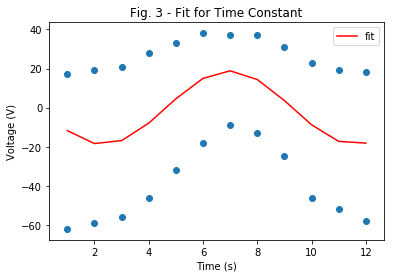

[[9.48647931e+01 2.89571716e-02]
 [2.89571716e-02 6.69701221e-03]]


In [10]:
#with sin function
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize


x = np.asarray(months)
y = np.asarray(data)



#def gauss_function(x, a, x0, sigma):
#    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#popt, pcov = optimize.curve_fit(gauss_function, x, y,p0=[1, 7, 3])
#plt.plot(x, gauss_function(x, *popt), label='fit')
def f(x, A, nu):
    return A * np.sin(nu * x)

popt, pcov = optimize.curve_fit(f, x, y,p0=[20,100])
plt.plot(x, f(x, *popt), label='fit',color='r')
# plot data

plt.scatter(x, y)

# Add some axis labels

plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()
print(pcov)

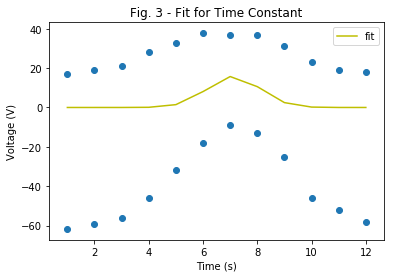

[[6.47731537e+02 1.94349796e-01 2.61119329e+01]
 [1.94349796e-01 3.26757719e+00 2.12410661e-02]
 [2.61119329e+01 2.12410661e-02 3.20441910e+00]]


In [11]:
#with gaussian function



x = np.asarray(months)
y = np.asarray(data)



def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = optimize.curve_fit(gauss_function, x, y,p0=[20, 6, 4])
plt.plot(x, gauss_function(x, *popt), label='fit',color='y')
def f(x, A, nu):
    return A * np.sin(nu * x)


# plot data

plt.scatter(x, y)

# Add some axis labels

plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()
print(pcov)

Ans:
* I tried two functions which both of them are good for this fitting. 

* Actually, we need more data to get a better fit for this case. As we can see in the gaussian fit there is a big error in the first months.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

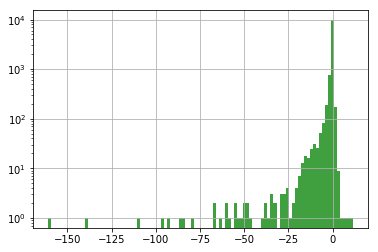

In [10]:
import pandas as pd
import numpy as np
import pickle
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize




with open('residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
a=data.tolist()
data=a['residuals']
n, bins, patches = plt.hist(a['residuals'], 100, facecolor='g', alpha=0.75)
#plt.xlim(-15, 5)
plt.yscale('log')
plt.grid(True)
unc=np.sqrt(n)


In [11]:
unc=np.sqrt(n)
print(unc)

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.41421356,
        0.        ,  1.        ,  0.        ,  1.41421356,  1.        ,
        0.        ,  1.41421356,  1.        ,  1.        ,  1.41421356,
        1.41421356,  1.        ,  0.        ,  0.        ,  0.  

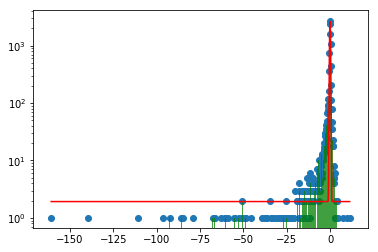

In [12]:
n, bins, patches = plt.hist(a['residuals'], 1000, facecolor='g', alpha=0.75)
x=(bins[1:]+bins[:-1])/2
y=[]
for i in range(len(n)):
    y.append(n[i])
plt.scatter(x,y)
plt.yscale('log')

def f(x,N,mu,sig,off):
    return N*np.exp(-np.power(x-mu,2)/(2*np.power(sig,2)))+off

y=np.asarray(y)
p0,p1 = optimize.curve_fit(f,x,y)
plt.plot(x,f(x,*p0),'r')

In [13]:
def f(x,N,mu,sig,off):
    return N*np.exp(-np.power(x-mu,2.)/(2*np.power(sig,2.)))+off

y=np.asarray(y)

p0,p1 = optimize.curve_fit(f,x,np.asarray(y))


In [14]:
np.sum((y-f(x,*p0))**2)

216231.3133192738

In [15]:
ssr = np.sum((y-(f(x,*p0)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.9877016036163131 
R = 0.9938317783288644
Covariance matrix:
 [[1.         0.12523836]
 [0.12523836 1.        ]]


n degrees of freedom = 996
chi2 = 890.4077856248823
p-value = 0.9926557020057265


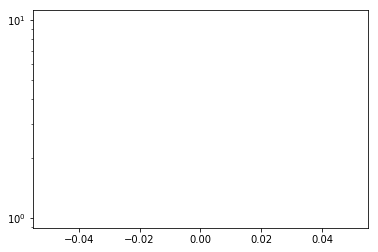

In [16]:
from scipy import stats
#p = np.arange(-150,0, 0.1)
ndof = len(x) - 4
sigma_y = np.sqrt(np.abs(y))
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = (np.sum((y-f(x,*p0))**2)/np.sum(unc))
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

#plt.plot(p, stats.chi2.cdf(p, df=ndof))
#plt.fill_between(x, y, where=(x > chi2), color='lightblue')
#plt.axvline(chi2, color='r')
#plt.yscale('log')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [17]:
import numpy as np
def f(t,a,b,c):
    return a*np.cos(2*t*np.pi+b)+c

In [18]:
df=pd.read_csv("munich_temperatures_average_with_bad_data.txt",sep=" ",header=None)

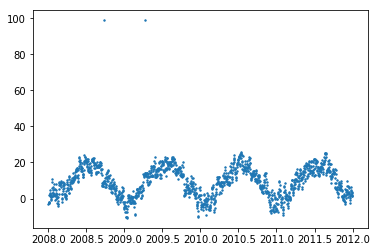

In [19]:
df=df[(df[0]> 2008) & (df[0]<2012)]
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
plt.scatter(df[0],df[1],s=2)
x=df[0]
y=df[1]

In [20]:
popt, pcov = optimize.curve_fit(f, df[0], df[1])

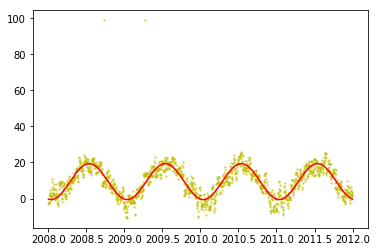

In [21]:
plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],f(df[0],*popt),'r')

In [22]:
#best values:
print('best values:','a=',popt[0],'b=',popt[1],'c=',popt[2])

best values: a= -9.988133689119586 b= 12.333023014181762 c= 9.38411487378277


In [23]:
dd=np.linspace(int(np.min(df[0])),int(np.max(df[0])),1000)
mn=np.min(f(dd,*popt))
mx=np.max(f(dd,*popt))
print('for function:','max hot=',mx,'min cold=',mn)

for function: max hot= 19.37221715732955 min cold= -0.6037792183796178


The meaning of b is the wavenumber in the wave function which is 2pi/lambda, and in this case, is the number of months in a year. Because every 12 months the temperature will be repeated.   b=12.3

In [24]:
def ff(t,a,b,c,d):
    return a*np.cos(2*t*np.pi*d+b)+c

In [25]:
popt1, pcov1 = optimize.curve_fit(ff, df[0], df[1])

In [26]:
popt1

array([-9.98218259, -5.90404276,  9.3981244 ,  1.001444  ])

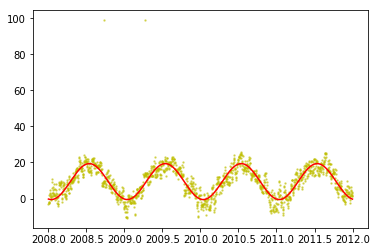

In [27]:
plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],ff(df[0],*popt1),'r')

In [28]:
popt1

array([-9.98218259, -5.90404276,  9.3981244 ,  1.001444  ])

In [29]:
print('overal avg:',np.mean(df[1]))

overal avg: 9.38409773497604


In [30]:
ssr = np.sum((y-(f(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.679593480080456 
R = 0.8243745993663657
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]


In [31]:
ssr = np.sum((y-(ff(x,*popt1)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.679659357145671 
R = 0.8244145541811299
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]


SSR: 34359.85859996422 34352.79405381721
Test Linear vs f:
CL: 0.584 , additional parameter necessary: NO


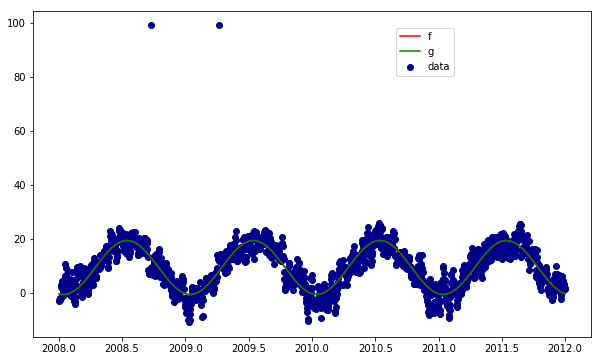

In [36]:
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


# generate data according to a certain distribution + random noise

# plot
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")
N=len(x)
# define fitting functions
def f1(x, a0, a1):
    return a0 + a1 * x

def f2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

fs, cov = optimize.curve_fit(f, x, y)
y1 = f(x, *fs)
ax.plot(x, y1, color='r', label="f")
ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 3 - 1 # n of parameters - 1

fg, cov = optimize.curve_fit(ff, x, y)
y2 = ff(x, *fg)
ax.plot(x, y2, color='g', label="g")
ssr_2 = np.sum((y2 - y)**2)
ndof_2 = 4 - 1 # n of parameters - 1



ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)

# run F-test
# test f2 vs f1
print("Test Linear vs f:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)


It means the f function is working well and we do not need additional parameter like g function.